## Data Preprocessing and Exploration

# 1. Load Dataset

In [1]:
# Imports
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset from scikit-learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add class label
df['species'] = iris.target

# Optional: map integers to species names
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Save to CSV
df.to_csv("iris_dataset.csv", index=False)

# Display first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


# Explanation:
* We load the built-in Iris dataset using load_iris().
* Features are sepal length, sepal width, petal length, petal width.
* Class labels (species) are integers; we also map them to species names for readability.
* The dataset is saved as CSV for reference.

## 2. Preprocess Data
* a. Check for Missing Values

In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


## Explanation:
* Ensures no missing data exists.
* If missing values were present, we could handle them via imputation (fillna) or removal.

## b. Normalize Features (Min-Max Scaling)

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select feature columns
features = iris.feature_names

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Show first 5 rows after scaling
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


# Explanation:
* Normalization scales all features between 0 and 1.
* This is important for algorithms sensitive to feature scale (e.g., K-Means, Neural Networks).

# c. Encode Class Labels

In [4]:
from sklearn.preprocessing import LabelEncoder

# Integer encoding (already exists in df['species'])
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species_name'])

# One-hot encoding
df_onehot = pd.get_dummies(df['species_name'], prefix='species')
print(df_onehot.head())


   species_setosa  species_versicolor  species_virginica
0            True               False              False
1            True               False              False
2            True               False              False
3            True               False              False
4            True               False              False


## Explanation
* Many models require numeric labels.
* species_encoded gives integer encoding.
* df_onehot provides one-hot encoding for models like neural networks or classification tasks requiring binary columns per class.

## 3. Explore Data
# a. Summary Statistics

In [5]:
# Summary statistics
print("Summary statistics:\n", df.describe())


Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)     species  species_encoded  
count        150.000000  150.000000       150.000000  
mean           0.458056    1.000000         1.000000  
std            0.317599    0.819232         0.819232  
min            0.000000    0.000000         0.000000  
25%            0.083333    0.000000         0.000000  
50%            0.500000    1.000000         1.000000  
75%     

# Explanation:
* describe() provides mean, standard deviation, min, max, quartiles for each feature.
* Helps identify general trends and data ranges.

 # b. Pairplot

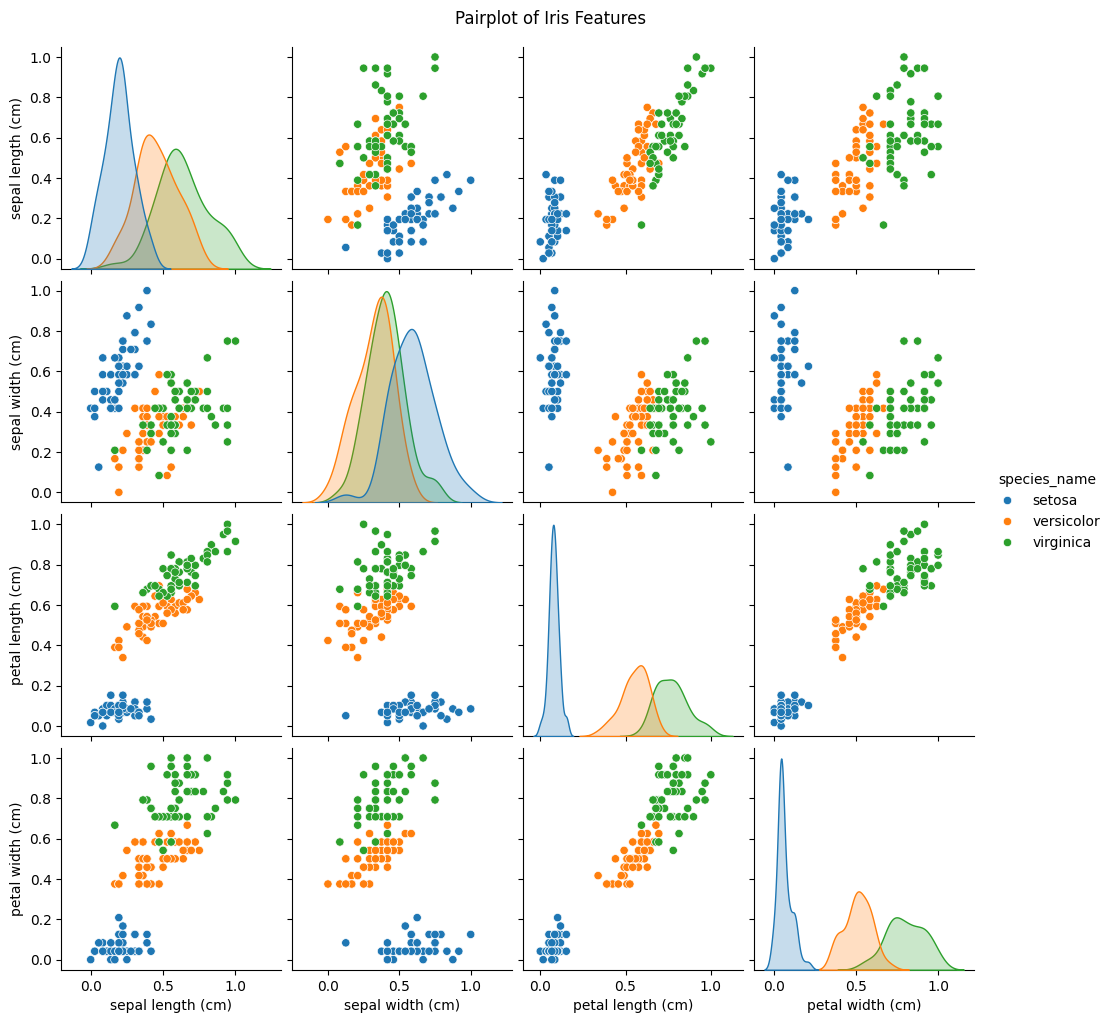

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot colored by species
sns.pairplot(df, hue='species_name', vars=features)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.savefig("iris_pairplot.png")
plt.show()
plt.close()


# Explanation:
* Visualizes relationships between all feature pairs.
* Coloring by species shows separability between classes.

# c. Correlation Heatmap

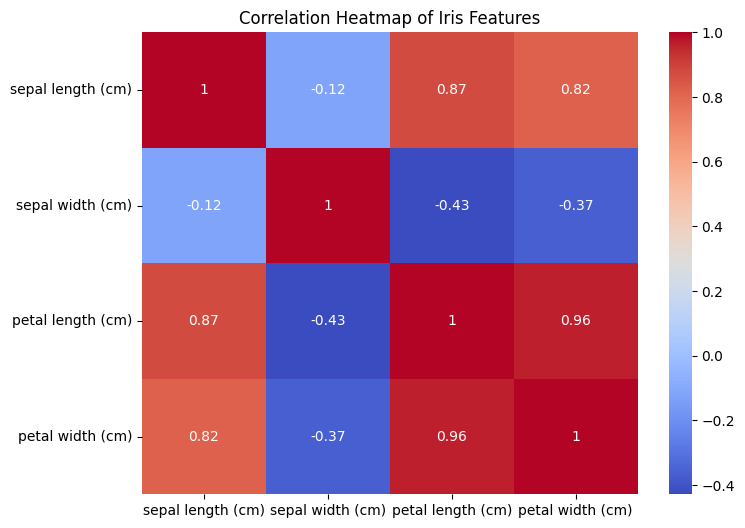

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.savefig("iris_correlation_heatmap.png")
plt.show()
plt.close()


# Explanation:
* Shows correlation between features (positive or negative).
* Useful to identify redundant features or strong linear relationships.

# d. Boxplots (Outlier Detection)

<Figure size 1200x800 with 0 Axes>

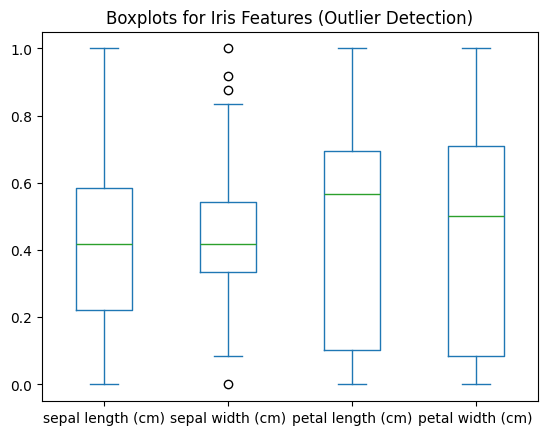

In [9]:
plt.figure(figsize=(12,8))
df[features].plot(kind='box')
plt.title("Boxplots for Iris Features (Outlier Detection)")
plt.savefig("iris_boxplots.png")
plt.show()
plt.close()


# Explanation:
* Detects potential outliers visually for each feature.
* Outliers appear as points outside whiskers in boxplots.

## 4. Train/Test Split Function

In [13]:
from sklearn.model_selection import train_test_split

def split_train_test(df, feature_cols, label_col, test_size=0.2, random_state=42):
    """
    Splits dataset into train and test sets.
    """
    X = df[feature_cols]
    y = df[label_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_train_test(df, features, 'species_encoded')
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


## Explanation:
* Splits data into 80% training and 20% testing by default.
* stratify=y ensures class proportions are preserved.
* Ready for model training and evaluation.